In [2]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [3]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [4]:
#포스코

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('005490', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

In [5]:
import xgboost as xgb

In [6]:
train_X.shape

(855, 10, 4)

In [7]:
train_X=train_X.reshape(855,40)

In [8]:
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)


my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [9]:
test_X.shape

(123, 10, 4)

In [10]:
test_X=test_X.reshape(123,40)

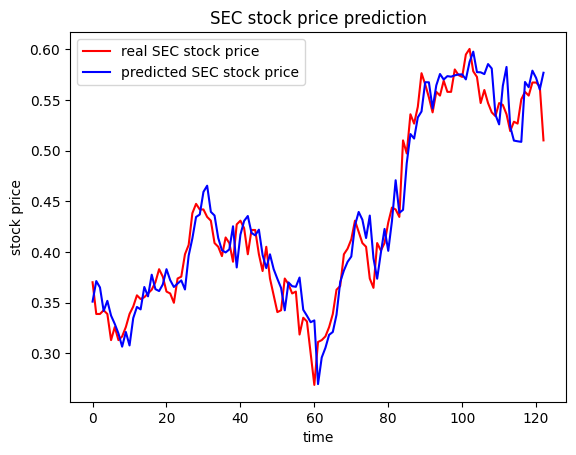

In [11]:
pred_y = my_model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [12]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))

print("RMSE :", RMSE(test_y, pred_y))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, pred_y)
print("R2 :", f2_y_predict)

RMSE : 0.02312438468777363
R2 : 0.932526468857052


In [21]:
#네이버

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('005930', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

In [22]:
train_X.shape

(855, 10, 4)

In [23]:
train_X=train_X.reshape(855,40)

In [24]:
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)


my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
test_X.shape

(123, 10, 4)

In [26]:
test_X=test_X.reshape(123,40)

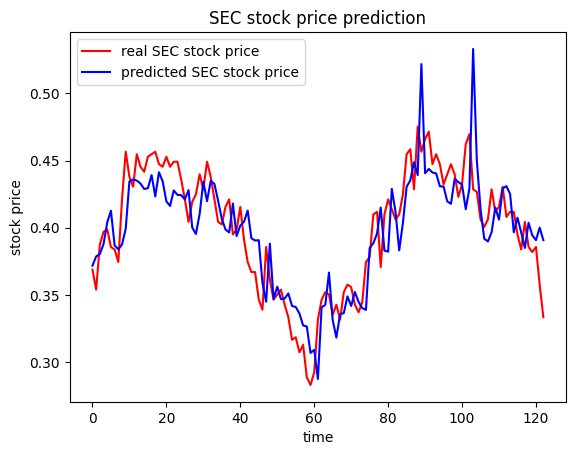

In [27]:
pred_y = my_model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [28]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))

print("RMSE :", RMSE(test_y, pred_y))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, pred_y)
print("R2 :", f2_y_predict)

RMSE : 0.02486625677569318
R2 : 0.6961348544157555
